In [7]:
# Andrew Dunn, Katherine Dumais, Kathryn Link-Oberstar, Lee-Or Bentovim
# Summary of initial feature engineering and model testing for checkpoint 2

# This analysis runs after we load, clean, and generate additional variables in load_data.py, 
# and initially explored the data in exploratory_analysis.ipynb.

In [16]:
# Import libraries and data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, classification_report
import load_data as ld
from collections import Counter
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SVMSMOTE

df, X_valid, y_valid = ld.load_train_data()

cols_to_drop = ['Id', 'idhogar', 'rez_esc']

#Data Cleaning
for dfs in [df, X_valid, y_valid]:
    dfs.replace([np.inf, -np.inf], np.nan, inplace=True) # Written by Kathryn Link-Oberstar 
    for col in cols_to_drop:
        if col in dfs.columns:
            dfs.drop(col, axis=1, inplace=True)
    dfs.fillna(df.mean(), inplace=True)

**Feature Engineering**



**Model Testing**

We tested variations of four different models: random forest, naive bayes, KNN, and logistic regression in the following notebooks:

Below, we demonstrate the best performing variants of those models.

In [15]:
# Random Forest

In [10]:
# Naive Bayes

In [11]:
# KNN

*Logistic Regression*\
The goal of logistic regression is to find the best parameters of a logistic function that minimizes the difference between the predicted probabilities and the actual outcomes. The logistic function uses the sigmoid function, which maps any real number into a range between 0 and 1, allowing us to interpret the output as a probability. The input features are weighted and combined linearly, and the resulting value is passed through the logistic function to produce a probability. We then use gradient descent to determine what the best classification is for these categories. Regularization helps to improve the generalization performance of the model by balancing the bias-variance trade-off and reducing overfitting.  By penalizing the weights of the input features, regularization encourages the model to focus on the most important features that are most relevant to the target variable. Overfitting occurs when a model learns to fit the training data too closely, including noise and irrelevant features, leading to poor generalization performance on new, unseen data. In this case we will try L2 regularization which adds a penalty term proportional to the square of the weights.

One drawback however, is that it assumes linear relationships which based on the diversity of our data, may not be true in this case. 

With Smote- RFE
Accuracy: 0.5714285714285714
F1 Score: 0.5972263574602699
Recall: 0.5714285714285714
With Random Selection- RFE
Accuracy: 0.5714285714285714
F1 Score: 0.5972263574602699
Recall: 0.5714285714285714
With Smote- Variance Threshold
Accuracy: 0.6638655462184874
F1 Score: 0.6483378884265315
Recall: 0.6638655462184874
With Random Selection-Variance threshold
Accuracy: 0.5756302521008403
F1 Score: 0.6138854603448888
Recall: 0.5756302521008403


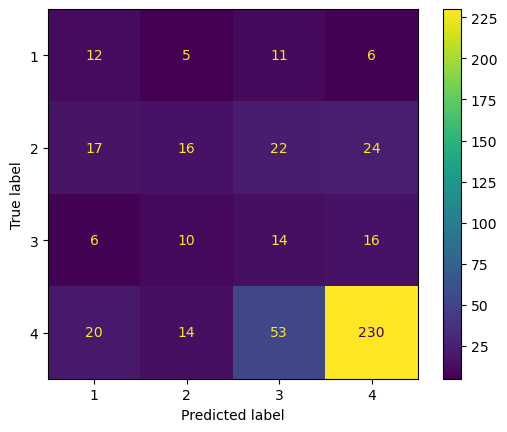

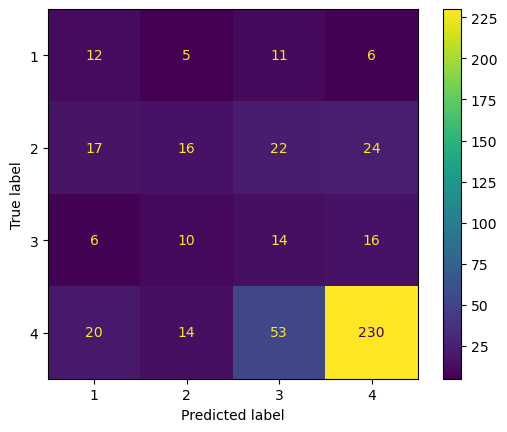

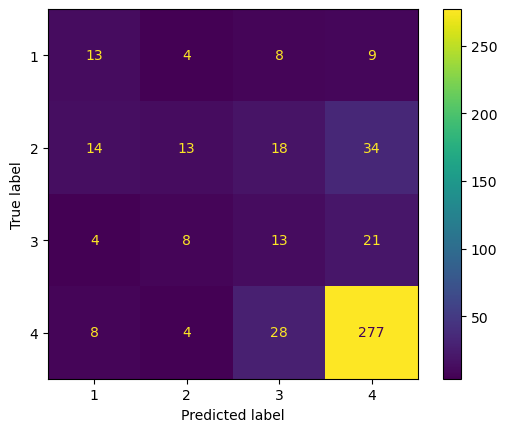

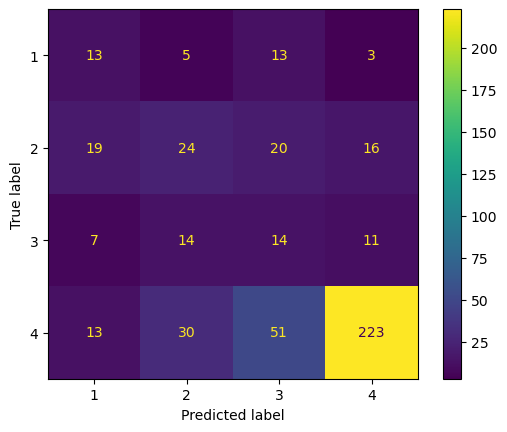

In [19]:
# Logistic Regression
X = df.iloc[: , :-1]
y = df.loc[:, 'Target']
## Will remove once we decide on final value 
def evaluate_classification(y_pred, y_true = y_valid, labels=[1,2,3,4], cm = False):
    '''
    Written by Kathryn Link- Oberstar 
    '''
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    if cm is True:
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot()



ros = RandomOverSampler(random_state=42)
sm = SVMSMOTE(random_state=42)

#Train our data with two oversampling methods: SVM SMOTE and random sampling with replacement 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
train_df_resampled, train_y_resampled = ros.fit_resample(X_train, y_train)

sm = SVMSMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)


print("With Smote- RFE")
#Recursive feature elimination
rfe = RFE(estimator=LogisticRegression(solver='liblinear', penalty='l2'),n_features_to_select = 5, step = 1)
rfe.fit(X_smote, y_smote)
y_pred = reg.predict(X_valid)
evaluate_classification(y_pred, y_true = y_valid, labels=[1,2,3,4], cm = True)

X_train.iloc[:,[138, 126, 127, 108, 107]]

print("With Random Selection- RFE")
#Recursive feature elimination
rfe = RFE(estimator=LogisticRegression(solver='liblinear', penalty='l2'),n_features_to_select = 5, step = 1)
rfe.fit(train_df_resampled, train_y_resampled)
y_pred = reg.predict(X_valid)
evaluate_classification(y_pred, y_true = y_valid, labels=[1,2,3,4], cm = True)


print("With Smote- Variance Threshold")
# get rid of features without a lot of variance 
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
a= X_smote.copy()
rev_x = sel.fit_transform(a)
reg = LogisticRegression(solver='liblinear', penalty='l2').fit(rev_x, y_smote)

y_pred = reg.predict(sel.transform(X_valid.copy()))
evaluate_classification(y_pred, y_true = y_valid, labels=[1,2,3,4], cm = True)

print("With Random Selection-Variance threshold")

# get rid of features without a lot of variance 
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
rev_x = sel.fit_transform(train_df_resampled.copy())
reg = LogisticRegression(solver='liblinear', penalty='l2').fit(rev_x, train_y_resampled)
a= X_valid.copy()
y_pred = reg.predict(sel.transform(a))
evaluate_classification(y_pred, y_true = y_valid, labels=[1,2,3,4], cm = True)


While, if we reference the logistic regression function, without overweighting we only classify the majority class 4 (please see regression document). With overweighting and feature selection methods, we get our best predictors using regularized logistic regression in terms of classification accuracy and F1 score. But given the diversity of the results, it is clear feature selection as opposed to logistic regression usage is the most important part of this work. It is unclear if regularized logistic regression will be the best indicator going forward.

** Discussion **